In [1]:
import pandas as pd
#ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/DataScience/supershops.csv')

In [5]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [6]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()

In [7]:
x =  df.drop('Profit', axis=1)

In [8]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [ ]:
y = df['Profit']

In [ ]:
df.isnull().sum() #checking null values

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [ ]:
#df.isnull()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        49 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#df.isnull()

In [ ]:
df[18:21] # to see the row from 18 to 20

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.57,Rangpur,124266.90
19,86419.70,153514.11,NaN,Dhaka,122776.86
20,76253.86,113867.30,298664.47,Ctg,118474.03


# Measure of Central Tendency

In [ ]:
df.Transport.mean() #no outliers

215331.73244897963

In [ ]:
df.Transport.median() #outliers exist

214634.81

<AxesSubplot:xlabel='Transport', ylabel='Count'>

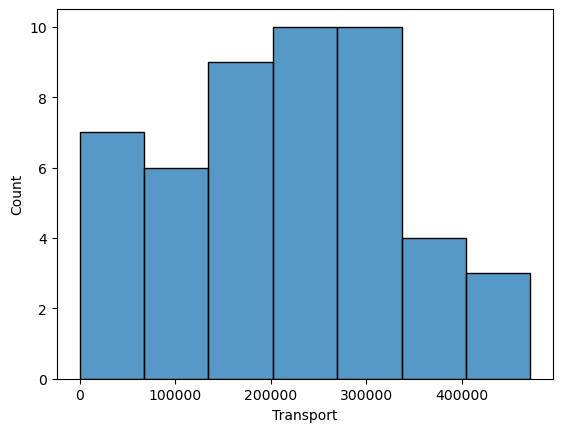

In [ ]:
import seaborn as sns
sns.histplot(df.Transport)

In [ ]:
mean = df.Transport.mean()
mean

215331.73244897963

In [ ]:
df.Transport = df.Transport.fillna(mean)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [ ]:
mean

215331.73244897963

In [ ]:
df[18:21]

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.570000,Rangpur,124266.90
19,86419.70,153514.11,215331.732449,Dhaka,122776.86
20,76253.86,113867.30,298664.470000,Ctg,118474.03


# Sklearn Preprocessing

Read sklearn: [Docs](https://scikit-learn.org/stable/modules/preprocessing.html)

### Some common encoding techniques in machine learning:

1. Label Encoding <br>
2. One-Hot Encoding <br>
3. Binary Encoding <br>
4. Ordinal Encoding <br>
5. Frequency Encoding <br>
6. Mean Encoding <br>
7. Text Embedding <br>

# Label Encoding

Label encoding is a technique used to convert categorical data into numerical labels. Each unique category value is assigned a unique integer. This method is useful when the categorical feature does not have an inherent order and you need to convert the categories to numerical values for machine learning algorithms that can handle categorical variables as numbers.

## When to Use Label Encoding

Label encoding is appropriate when:
- The categorical feature does not have a meaningful order.
- You want to convert categorical values to unique integers for algorithms that can work with numerical labels.

## Steps to Perform Label Encoding

1. **Identify unique categories in the feature.**
2. **Assign a unique integer to each category.**

In [ ]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

Watch it: [fit Vs. transform](https://youtu.be/0T3MpmbAHXg)

In [ ]:
df1.Area = le.fit_transform(df[['Area']])

In [ ]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [ ]:
le.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype=object)

In [ ]:
le.transform(le.classes_)

array([0, 1, 2])

# Decode the encoded values back to original classes

In [ ]:
#df.Area = decoded_classes = le.inverse_transform(df1.Area)
decoded_classes = le.inverse_transform(df1.Area)
decoded_classes

array(['Dhaka', 'Ctg', 'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg', 'Rangpur', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Dhaka', 'Rangpur', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Dhaka',
       'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg'],
      dtype=object)

In [ ]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [ ]:
#After decoding
df1.Area = decoded_classes
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# Label Encoding with Label mapping

In [ ]:
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [ ]:
label_mapping = {
    'Dhaka': 1,
    'Rangpur': 2,
    'Ctg': 0
}

In [ ]:
label_mapping

{'Dhaka': 1, 'Rangpur': 2, 'Ctg': 0}

In [ ]:
label_mapping.keys()

dict_keys(['Dhaka', 'Rangpur', 'Ctg'])

In [ ]:
label_mapping.values()

dict_values([1, 2, 0])

In [ ]:
df2.Area = [label_mapping[area] for area in df2.Area] #List comprehension

In [ ]:
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [ ]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# Replace Method

In [ ]:
df3['Area'] = df3['Area'].replace(label_mapping)

In [ ]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# One Hot Encoder

In [ ]:
df4.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
pd.get_dummies(df4['Area']).head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [ ]:
pd.get_dummies(df4['Area'], drop_first=True).head() #dummy var trap

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [ ]:
pd.get_dummies(df4['Area'], drop_first=True, prefix='Area').head()

,Area_Dhaka,Area_Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [ ]:
dummy = pd.get_dummies(df4['Area'], drop_first=True, prefix='Area', prefix_sep=' ' )

In [ ]:
dummy.head()

,Area Dhaka,Area Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [ ]:
df4.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
df4.drop('Area', axis=1, inplace=True)

In [ ]:
df4.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
dummy.head()

,Area Dhaka,Area Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [ ]:
#new_df4 = pd.concat([df4, pd.get_dummies(df4['Area'], drop_first=True, prefix='Area', prefix_sep='_' )], axis=1)
new_df4 = pd.concat([df4, dummy], axis=1)

In [ ]:
new_df4.head()

,Marketing Spend,Administration,Transport,Profit,Area Dhaka,Area Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


# One-Hot Encoding with LabelBinarizer

Use `LabelBinarizer` for simple and straightforward binary encoding tasks with low-cardinality categorical features.

In [ ]:
df5.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
area_encoded = lb.fit_transform(df5['Area'])

area_encoded_df = pd.DataFrame(area_encoded, columns=lb.classes_)
area_encoded_df.head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [ ]:
lb.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype='<U7')

#### `Dummy variable trap:`
This drops the first column from the encoded DataFrame to avoid the dummy variable trap. You can choose any one column to drop.

In [ ]:
# Drop one of the columns to avoid the dummy variable trap
area_encoded_df = area_encoded_df.drop(columns=lb.classes_[0])
area_encoded_df.head()

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [ ]:
df5_encoded = pd.concat([df5.drop('Area', axis=1), area_encoded_df], axis=1)
df5_encoded.head()

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


# Ordinal Encoding

Ordinal encoding is a technique used to convert categorical data into numerical values based on the order or rank of the categories. This method is useful when the categorical feature has an inherent order or hierarchy.

## When to Use Ordinal Encoding

Ordinal encoding is appropriate when:
- The categorical feature has a meaningful order or ranking.
- You want to preserve the order information in the encoded values.

## Steps to Perform Ordinal Encoding

1. **Identify the order or rank of the categories.**
2. **Assign numerical values based on the order or rank.**

In [ ]:
df6.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
df6.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal = OrdinalEncoder(categories = [['Dhaka', 'Ctg', 'Rangpur']])
ordinal

OrdinalEncoder(categories=[['Dhaka', 'Ctg', 'Rangpur']])

In [ ]:
df6.Area = ordinal.fit_transform(df5[['Area']])

In [ ]:
df6.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,191792.06
2,153441.51,101145.55,407934.54,2.0,191050.39
3,144372.41,118671.85,383199.62,0.0,182901.99
4,142107.34,91391.77,366168.42,2.0,166187.94


# Binary Encoding

Binary encoding is a method used to convert categorical data into binary (0s and 1s) features. It reduces the dimensionality compared to one-hot encoding and is useful for high-cardinality features.
#### Binary Encoding using "category_encoders"
Use `category_encoders` for more complex encoding needs, especially when dealing with high-cardinality features or when needing specialized encodings like target encoding.

In [ ]:
df7.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
#!pip install category_encoders
import category_encoders as ce

In [ ]:
BinEn = ce.BinaryEncoder(cols=['Area'])
BinEn

BinaryEncoder(cols=['Area'])

In [ ]:
df7_binary_encoded = BinEn.fit_transform(df)
df7_binary_encoded.head()

,Marketing Spend,Administration,Transport,Area_0,Area_1,Profit
0,114523.61,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,191792.06
2,153441.51,101145.55,407934.54,1,1,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,1,166187.94


# Mean Encoding

Mean encoding is typically based on the `target variable` because it aims to capture the relationship between the categorical feature and the target variable. In this case, `y= Profit` is the target variable we want to analyze.

In [ ]:
df8.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
mean_encoded_area = df8.groupby('Area')['Profit'].mean().to_dict()
mean_encoded_area

{'Ctg': 103905.17529411765,
 'Dhaka': 113756.44647058823,
 'Rangpur': 118774.02437500001}

In [ ]:
unique_areas = df8['Area'].unique()
unique_areas

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [ ]:
df7['Area'] = df8['Area'].map(mean_encoded_area)
df7.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,113756.446471,192261.83
1,162597.70,151377.59,443898.53,103905.175294,191792.06
2,153441.51,101145.55,407934.54,118774.024375,191050.39
3,144372.41,118671.85,383199.62,113756.446471,182901.99
4,142107.34,91391.77,366168.42,118774.024375,166187.94


# Frequency Encoding

Frequency encoding is a technique where categorical features are replaced with their frequency counts. This method can be useful when the frequency of categories holds meaningful information for the model.

#### Steps to Perform Frequency Encoding

1. **Calculate the frequency of each category.**
2. **Replace each category with its frequency count.**


In [ ]:
df9 = df.copy()
df9.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
frequency_encoding = df9['Area'].value_counts().to_dict()
frequency_encoding

{'Dhaka': 17, 'Ctg': 17, 'Rangpur': 16}

In [ ]:
df['Area_Frequency_Encoded'] = df['Area'].map(frequency_encoding)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit,Area_Frequency_Encoded
0,114523.61,136897.80,471784.10,Dhaka,192261.83,17
1,162597.70,151377.59,443898.53,Ctg,191792.06,17
2,153441.51,101145.55,407934.54,Rangpur,191050.39,16
3,144372.41,118671.85,383199.62,Dhaka,182901.99,17
4,142107.34,91391.77,366168.42,Rangpur,166187.94,16
